# Stock market prediction

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv('./individual_stocks_5yr/individual_stocks_5yr/AAPL_data.csv') 

In [6]:
df.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL
4,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    1259 non-null   object 
 1   open    1259 non-null   float64
 2   high    1259 non-null   float64
 3   low     1259 non-null   float64
 4   close   1259 non-null   float64
 5   volume  1259 non-null   int64  
 6   Name    1259 non-null   object 
dtypes: float64(4), int64(1), object(2)
memory usage: 69.0+ KB


In [8]:
df.describe()

,open,high,low,close,volume
count,1259.000000,1259.000000,1259.000000,1259.000000,1.259000e+03
mean,109.055429,109.951118,108.141589,109.066698,5.404790e+07
std,30.549220,30.686186,30.376224,30.556812,3.346835e+07
min,55.424200,57.085700,55.014200,55.789900,1.147592e+07
25%,84.647800,85.334950,84.250650,84.830650,2.969438e+07
50%,108.970000,110.030000,108.050000,109.010000,4.566893e+07
75%,127.335000,128.100000,126.290000,127.120000,6.870872e+07
max,179.370000,180.100000,178.250000,179.260000,2.668336e+08


In [9]:
df.shape

(1259, 7)

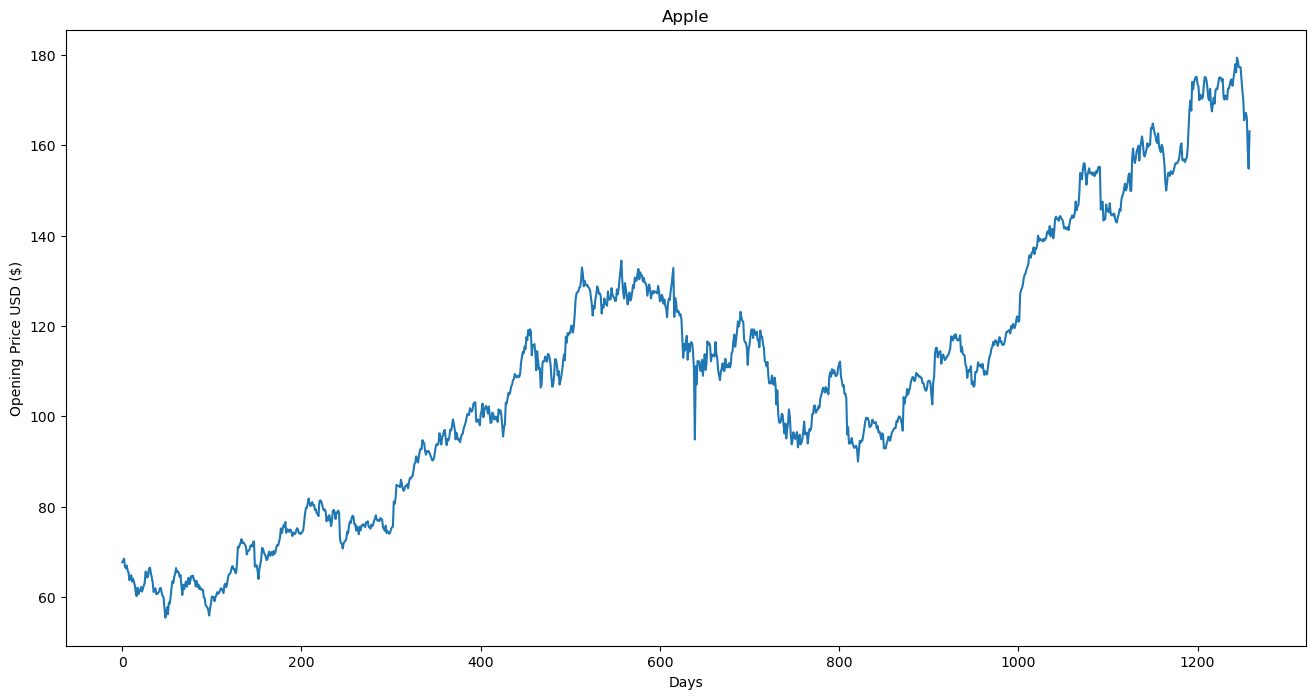

In [10]:
# Visualizing the opening prices of the data.
plt.figure(figsize=(16,8))
plt.title('Apple')
plt.xlabel('Days')
plt.ylabel('Opening Price USD ($)')
plt.plot(df['open'])
plt.show()


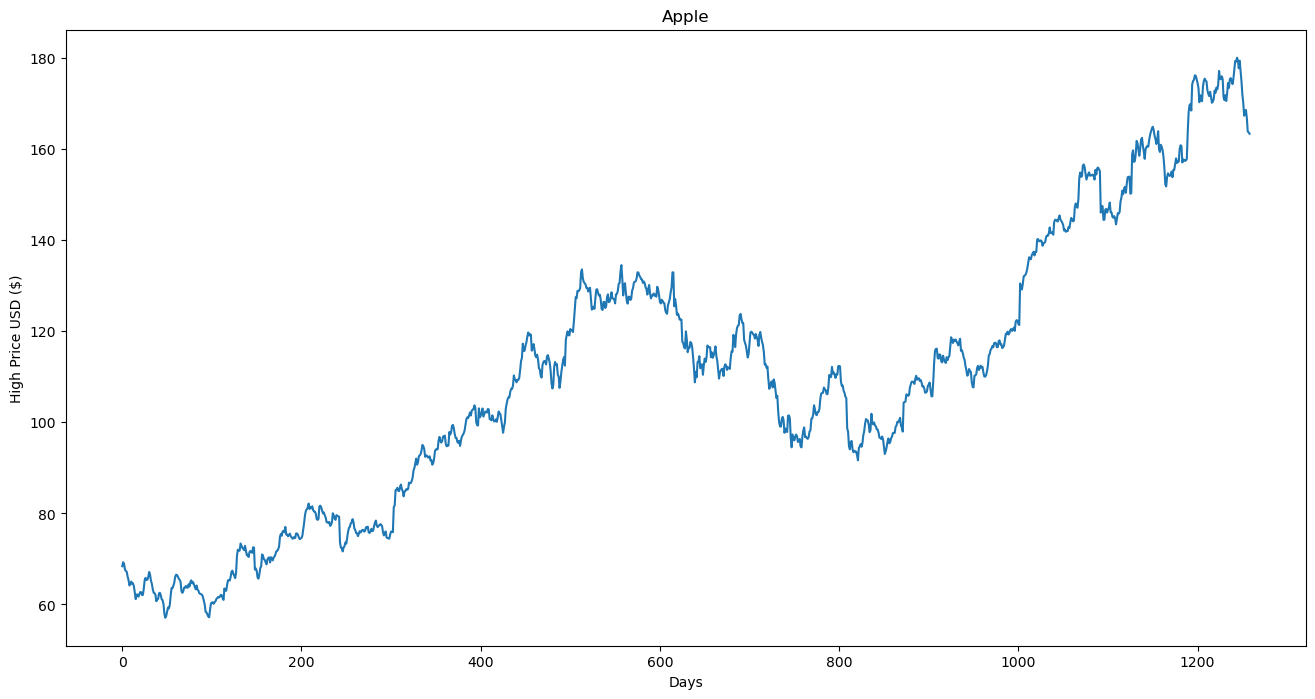

In [11]:
# Visualizing the high prices of the data.
plt.figure(figsize=(16,8))
plt.title('Apple')
plt.xlabel('Days')
plt.ylabel('High Price USD ($)')
plt.plot(df['high'])
plt.show()


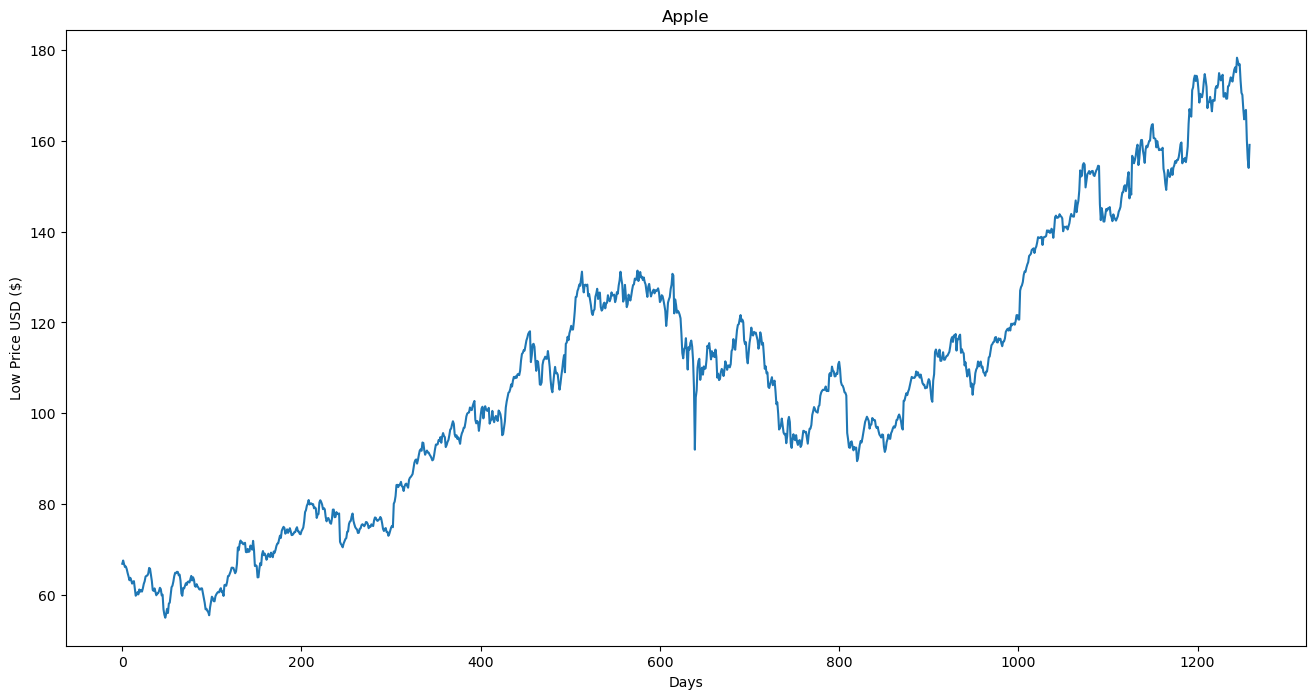

In [12]:
# Visualizing the low prices of the data.
plt.figure(figsize=(16,8))
plt.title('Apple')
plt.xlabel('Days')
plt.ylabel('Low Price USD ($)')
plt.plot(df['low'])
plt.show()

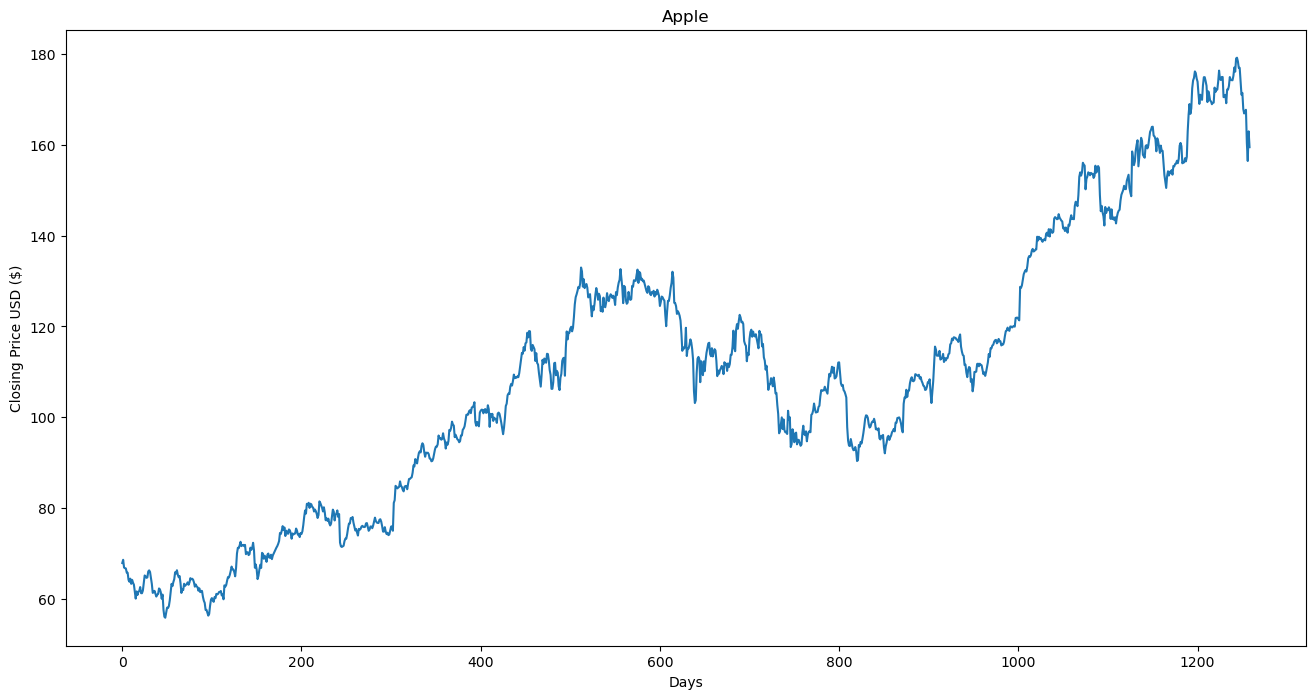

In [13]:
# Visualizing the closing prices of the data.
plt.figure(figsize=(16,8))
plt.title('Apple')
plt.xlabel('Days')
plt.ylabel('Closing Price USD ($)')
plt.plot(df['close'])
plt.show()

In [14]:
df2 = df['close']

In [15]:
df2.tail()

1254    167.78
1255    160.50
1256    156.49
1257    163.03
1258    159.54
Name: close, dtype: float64

In [16]:
df2 = pd.DataFrame(df2) 

In [17]:
df2.tail()

,close
1254,167.78
1255,160.50
1256,156.49
1257,163.03
1258,159.54


In [18]:
# Prediction 100 days into the future.
future_days = 100
df2['Prediction'] = df2['close'].shift(-future_days)


In [19]:
df2.tail()

,close,Prediction
1254,167.78,NaN
1255,160.50,NaN
1256,156.49,NaN
1257,163.03,NaN
1258,159.54,NaN


In [20]:
X = np.array(df2.drop(['Prediction'], 1))[:-future_days]
print(X)

[[ 67.8542]
 [ 68.5614]
 [ 66.8428]
 ...
 [160.86  ]
 [159.65  ]
 [158.28  ]]


C:\Users\SUSHMA\AppData\Local\Temp\ipykernel_2424\1853731690.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = np.array(df2.drop(['Prediction'], 1))[:-future_days]


In [21]:
y = np.array(df2['Prediction'])[:-future_days]
print(y)

[ 60.1142  59.6314  59.2928 ... 156.49   163.03   159.54  ]


In [22]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [23]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression

In [24]:
# Implementing Linear and Decision Tree Regression Algorithms.
tree = DecisionTreeRegressor().fit(x_train, y_train)
lr = LinearRegression().fit(x_train, y_train)

In [25]:
x_future = df2.drop(['Prediction'], 1)[:-future_days]
x_future = x_future.tail(future_days)
x_future = np.array(x_future)
x_future

C:\Users\SUSHMA\AppData\Local\Temp\ipykernel_2424\1876488320.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x_future = df2.drop(['Prediction'], 1)[:-future_days]


array([[144.53],
       [143.68],
       [143.79],
       [143.65],
       [146.58],
       [147.51],
       [147.06],
       [146.53],
       [148.96],
       [153.01],
       [153.99],
       [153.26],
       [153.95],
       [156.1 ],
       [155.7 ],
       [155.47],
       [150.25],
       [152.54],
       [153.06],
       [153.99],
       [153.8 ],
       [153.34],
       [153.87],
       [153.61],
       [153.67],
       [152.76],
       [153.18],
       [155.45],
       [153.93],
       [154.45],
       [155.37],
       [154.99],
       [148.98],
       [145.42],
       [146.59],
       [145.16],
       [144.29],
       [142.27],
       [146.34],
       [145.01],
       [145.87],
       [145.63],
       [146.28],
       [145.82],
       [143.73],
       [145.83],
       [143.68],
       [144.02],
       [143.5 ],
       [144.09],
       [142.73],
       [144.18],
       [145.06],
       [145.53],
       [145.74],
       [147.77],
       [149.04],
       [149.56],
       [150.08

In [26]:
tree_prediction = tree.predict(x_future)
print(tree_prediction)

[159.88  164.325 158.73  156.07  168.11  151.89  151.89  153.14  154.23
 153.28  155.06  159.88  154.48  153.48  170.57  157.1   155.84  155.9
 156.55  155.06  156.99  159.88  156.41  159.76  155.98  156.25  156.55
 157.1   156.41  157.41  163.05  166.72  169.04  166.89  168.11  172.5
 173.07  167.23  153.14  175.88  174.67  173.97  153.14  169.08  171.1
 170.15  164.325 173.14  174.96  174.97  160.86  173.07  169.48  171.85
 171.05  169.8   169.64  169.01  155.84  169.37  172.67  171.7   172.27
 172.22  173.97  176.42  174.54  154.23  175.01  175.28  170.57  153.48
 171.08  169.23  172.26  172.23  175.28  175.    174.35  174.33  175.28
 175.28  175.28  176.19  179.1   179.26  175.    177.    177.04  174.22
 171.11  171.51  167.96  166.97  167.43  167.78  160.5   156.49  163.03
 159.54 ]


In [28]:
lr_prediction = lr.predict(x_future)
print(lr_prediction)

[151.00881891 150.2072901  150.31101736 150.17900085 152.94191781
 153.81888463 153.39454585 152.89476906 155.18619849 159.00524754
 159.92936311 159.24099131 159.89164411 161.91904052 161.54185049
 161.32496622 156.40263634 158.56204925 159.05239629 159.92936311
 159.75019785 159.31642931 159.8162061  159.57103258 159.62761109
 158.76950377 159.1655533  161.30610672 159.87278461 160.36313165
 161.23066871 160.87233819 155.20505799 151.84806673 152.95134756
 151.60289321 150.78250489 148.87769524 152.7156038  151.46144695
 152.27240551 152.04609149 152.65902529 152.22525676 150.25443885
 152.23468651 150.2072901  150.52790162 150.03755459 150.59390988
 149.31146378 150.67877764 151.5085957  151.95179399 152.14981875
 154.06405815 155.2616365  155.75198353 156.24233057 157.12872714
 156.48750409 156.42149584 158.13771047 158.75064427 159.42958632
 156.69495861 155.69540503 154.96931422 164.26704845 162.89973459
 161.41926373 162.19250329 164.47450297 165.67208131 166.59619688
 161.18351

In [29]:
predictions = tree_prediction 
valid = df2[X.shape[0]:]
valid['Predictions'] = predictions

C:\Users\SUSHMA\AppData\Local\Temp\ipykernel_2424\4118842179.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


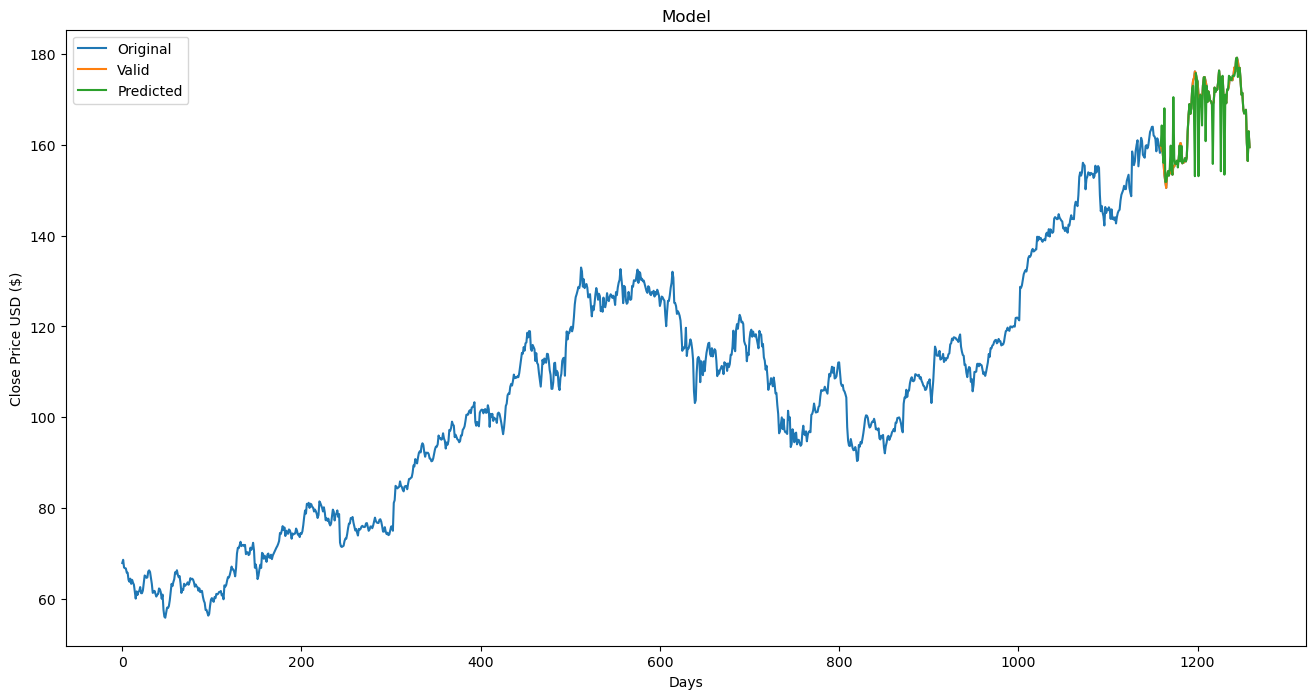

In [30]:
plt.figure(figsize=(16,8))
plt.title("Model")
plt.xlabel('Days')
plt.ylabel('Close Price USD ($)')
plt.plot(df2['close'])
plt.plot(valid[['close', 'Predictions']])
plt.legend(["Original", "Valid", 'Predicted'])
plt.show()
